In [38]:
import pandas as pd

df = pd.read_csv (r'./dataset.csv')
df

,id,created,facebook_id,gender,age,salary,other_income,parent_num,child_num,marriage,infirm,risk_question,risk_type,categories_version,categories_data,ans_type
0,21,2021-01-28 10:01:05.376329+00:00,2874096129581803,2,21,20000,60000,2,0,1,1,"[4, 3, 3, [4, 3, 1], 2, 3, 3, 3, 3, 3]",3,1,"{'Art': 0, 'Band': 0, 'Chef': 1, 'Mood': 0, 'S...",2
1,22,2021-01-28 10:01:05.912085+00:00,2874096129581803,2,21,20000,60000,2,0,1,1,"[4, 3, 3, [4, 3, 1], 2, 3, 3, 3, 3, 3]",3,2,"{'Art': 0, 'Band': 0, 'Chef': 1, 'Mood': 0, 'S...",2
2,23,2021-01-28 10:51:18.011598+00:00,1467108093486495,1,21,13000,6000,2,0,1,1,"[4, 2, 3, [1, 2, 3, 4], 2, 2, 3, 2, 3, 2]",2,1,"{'Art': 1, 'Band': 1, 'Chef': 0, 'Mood': 0, 'S...",2
3,24,2021-01-28 10:51:19.027727+00:00,1467108093486495,1,21,13000,6000,2,0,1,1,"[4, 2, 3, [1, 2, 3, 4], 2, 2, 3, 2, 3, 2]",2,2,"{'Art': 3, 'Band': 1, 'Chef': 0, 'Mood': 0, 'S...",2
4,25,2021-01-28 11:16:44.181398+00:00,1163951720692153,2,22,25000,360000,4,0,1,1,"[4, 4, 4, [4], 4, 4, 4, 4, 4, 4]",4,1,"{'Art': 2, 'Band': 0, 'Chef': 0, 'Mood': 0, 'S...",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,88,2021-02-09 14:59:18.179129+00:00,6680332541992110,1,36,12000,0,0,2,2,1,"[3, 3, 1, [1], 2, 2, 3, 2, 4, 3]",2,2,"{'Art': 3, 'Band': 1, 'Chef': 1, 'Mood': 0, 'S...",3
62,89,2021-02-12 03:14:17.466448+00:00,1819910071491921,1,47,80000,0,2,2,2,1,"[2, 2, 3, [1, 2, 3, 4], 3, 2, 3, 3, 3, 4]",2,1,"{'Art': 0, 'Band': 0, 'Chef': 0, 'Mood': 0, 'S...",2
63,90,2021-02-12 03:14:18.021806+00:00,1819910071491921,1,47,80000,0,2,2,2,1,"[2, 2, 3, [1, 2, 3, 4], 3, 2, 3, 3, 3, 4]",2,2,"{'Art': 0, 'Band': 0, 'Chef': 0, 'Mood': 0, 'S...",2
64,91,2021-02-16 08:25:19.036053+00:00,3869634116392861,2,24,80000,2500000,0,2,2,1,"[4, 2, 3, [1], 2, 3, 3, 3, 3, 3]",2,1,"{'Art': 1, 'Band': 0, 'Chef': 0, 'Mood': 0, 'S...",2


In [39]:
import json
temp_list = []
for i in df['risk_question']:
    x = json.loads(i)
    temp_list.append(x)
temp_list 
df['risk_question'] = temp_list 

for i in range(1,11):
    df[f'risk_question_{i}'] = df['risk_question'].apply(lambda x:x[i-1])

for i in range(1,5):
    temp_list = []
    for j in df['risk_question_4']:
        if i in j:
            temp_list.append(1)
        else:
            temp_list.append(0)
    df[f'risk_question_4_{i}'] = temp_list
    
df['gender'] = df['gender'] - 1
df['marriage'] = df['marriage'] - 1

for i in range(1,11):
    if i != 4:
        temp_list_1 = []
        temp_list_2 = []
        temp_list_3 = []
        temp_list_4 = []
        for j in df[f'risk_question_{i}']:
            if j == 1:
                temp_list_1.append(1)
                temp_list_2.append(0)
                temp_list_3.append(0)
                temp_list_4.append(0)
            elif j == 2:
                temp_list_1.append(0)
                temp_list_2.append(1)
                temp_list_3.append(0)
                temp_list_4.append(0)
            elif j == 3:
                temp_list_1.append(0)
                temp_list_2.append(0)
                temp_list_3.append(1)
                temp_list_4.append(0)
            elif j == 4:
                temp_list_1.append(0)
                temp_list_2.append(0)
                temp_list_3.append(0)
                temp_list_4.append(1)
        df[f'risk_question_{i}_1'] = temp_list_1
        df[f'risk_question_{i}_2'] = temp_list_2
        df[f'risk_question_{i}_3'] = temp_list_3
        df[f'risk_question_{i}_4'] = temp_list_4

df

,id,created,facebook_id,gender,age,salary,other_income,parent_num,child_num,marriage,...,risk_question_8_3,risk_question_8_4,risk_question_9_1,risk_question_9_2,risk_question_9_3,risk_question_9_4,risk_question_10_1,risk_question_10_2,risk_question_10_3,risk_question_10_4
0,21,2021-01-28 10:01:05.376329+00:00,2874096129581803,1,21,20000,60000,2,0,0,...,1,0,0,0,1,0,0,0,1,0
1,22,2021-01-28 10:01:05.912085+00:00,2874096129581803,1,21,20000,60000,2,0,0,...,1,0,0,0,1,0,0,0,1,0
2,23,2021-01-28 10:51:18.011598+00:00,1467108093486495,0,21,13000,6000,2,0,0,...,0,0,0,0,1,0,0,1,0,0
3,24,2021-01-28 10:51:19.027727+00:00,1467108093486495,0,21,13000,6000,2,0,0,...,0,0,0,0,1,0,0,1,0,0
4,25,2021-01-28 11:16:44.181398+00:00,1163951720692153,1,22,25000,360000,4,0,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,88,2021-02-09 14:59:18.179129+00:00,6680332541992110,0,36,12000,0,0,2,1,...,0,0,0,0,0,1,0,0,1,0
62,89,2021-02-12 03:14:17.466448+00:00,1819910071491921,0,47,80000,0,2,2,1,...,1,0,0,0,1,0,0,0,0,1
63,90,2021-02-12 03:14:18.021806+00:00,1819910071491921,0,47,80000,0,2,2,1,...,1,0,0,0,1,0,0,0,0,1
64,91,2021-02-16 08:25:19.036053+00:00,3869634116392861,1,24,80000,2500000,0,2,1,...,1,0,0,0,1,0,0,0,1,0


In [40]:
temp_list = []
for i in df['categories_data']:
    x = json.loads(i.replace("'", '"')) 
    temp_list.append(x)
df['categories_data'] = temp_list

key_list = []
for key in df['categories_data'][0].keys():
    key_list.append(key)
print(key_list)

for key in key_list:
    df[key] = df['categories_data'].apply(lambda x:x.get(key))
df

['Art', 'Band', 'Chef', 'Mood', 'Show', 'Actor', 'Brand', 'Cause', 'Color', 'Event', 'Gamer', 'Legal', 'Music', 'Topic', 'Artist', 'Author', 'Course', 'Dancer', 'Editor', 'Sports', 'Writer', 'Athlete', 'Blogger', 'Cuisine', 'Finance', 'Profile', 'Science', 'Comedian', 'Designer', 'Diseases', 'Election', 'Fan Page', 'Language', 'Locality', 'Musician', 'Producer', 'Community', 'Education', 'Orchestra', 'Residence', 'Scientist', 'Surgeries', 'Journalist', 'Agriculture', 'Labor Union', 'Nationality', 'Real Estate', 'Social Club', 'Sports Club', 'TV & Movies', 'Visual Arts', 'Work Status', 'Armed Forces', 'Concert Tour', 'Entrepreneur', 'Just For Fun', 'Meeting Room', 'Talent Agent', 'Ticket Sales', 'Work Project', 'Fashion Model', 'Film Director', 'Fitness Model', 'Literary Arts', 'Local Service', 'Musician/Band', 'Public Toilet', 'Satire/Parody', 'Sports Season', 'Video Creator', 'Work Position', 'Not a Business', 'Campus Building', 'Digital Creator', 'Food & Beverage', 'Harmonized Page',

,id,created,facebook_id,gender,age,salary,other_income,parent_num,child_num,marriage,...,Media Restoration Service,Religious Place of Worship,"Automotive, Aircraft & Boat",Landmark & Historical Place,Public & Government Service,Automated Teller Machine (ATM),"Beauty, Cosmetic & Personal Care","Science, Technology & Engineering",Non-Governmental Organization (NGO),Environmental Conservation Organization
0,21,2021-01-28 10:01:05.376329+00:00,2874096129581803,1,21,20000,60000,2,0,0,...,0,0,16,0,0,0,1,2,0,0
1,22,2021-01-28 10:01:05.912085+00:00,2874096129581803,1,21,20000,60000,2,0,0,...,0,0,16,0,1,0,2,6,0,0
2,23,2021-01-28 10:51:18.011598+00:00,1467108093486495,0,21,13000,6000,2,0,0,...,0,0,1,0,1,0,3,10,0,0
3,24,2021-01-28 10:51:19.027727+00:00,1467108093486495,0,21,13000,6000,2,0,0,...,0,0,2,0,2,0,3,15,0,0
4,25,2021-01-28 11:16:44.181398+00:00,1163951720692153,1,22,25000,360000,4,0,0,...,0,0,0,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,88,2021-02-09 14:59:18.179129+00:00,6680332541992110,0,36,12000,0,0,2,1,...,0,6,2,2,3,0,20,7,1,0
62,89,2021-02-12 03:14:17.466448+00:00,1819910071491921,0,47,80000,0,2,2,1,...,0,0,2,1,2,0,0,9,3,1
63,90,2021-02-12 03:14:18.021806+00:00,1819910071491921,0,47,80000,0,2,2,1,...,0,0,2,1,5,0,0,13,3,1
64,91,2021-02-16 08:25:19.036053+00:00,3869634116392861,1,24,80000,2500000,0,2,1,...,0,0,9,0,0,0,2,14,0,0


In [41]:
drop_list = ['id', 'created', 'facebook_id', 'risk_question','categories_data','infirm']
for i in range(1,11):
    drop_list.append(f'risk_question_{i}')
df.drop(drop_list, axis=1, inplace=True)
df.to_csv('pre_process_format.csv')
df

,gender,age,salary,other_income,parent_num,child_num,marriage,risk_type,categories_version,ans_type,...,Media Restoration Service,Religious Place of Worship,"Automotive, Aircraft & Boat",Landmark & Historical Place,Public & Government Service,Automated Teller Machine (ATM),"Beauty, Cosmetic & Personal Care","Science, Technology & Engineering",Non-Governmental Organization (NGO),Environmental Conservation Organization
0,1,21,20000,60000,2,0,0,3,1,2,...,0,0,16,0,0,0,1,2,0,0
1,1,21,20000,60000,2,0,0,3,2,2,...,0,0,16,0,1,0,2,6,0,0
2,0,21,13000,6000,2,0,0,2,1,2,...,0,0,1,0,1,0,3,10,0,0
3,0,21,13000,6000,2,0,0,2,2,2,...,0,0,2,0,2,0,3,15,0,0
4,1,22,25000,360000,4,0,0,4,1,2,...,0,0,0,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0,36,12000,0,0,2,1,2,2,3,...,0,6,2,2,3,0,20,7,1,0
62,0,47,80000,0,2,2,1,2,1,2,...,0,0,2,1,2,0,0,9,3,1
63,0,47,80000,0,2,2,1,2,2,2,...,0,0,2,1,5,0,0,13,3,1
64,1,24,80000,2500000,0,2,1,2,1,2,...,0,0,9,0,0,0,2,14,0,0


In [42]:
df_1 = df[df['categories_version'] == 1] .copy()
df_1.to_csv('categories_version_1.csv')
df_2 = df[df['categories_version'] == 2] .copy()
df_2.to_csv('categories_version_2.csv')

In [43]:
df = df_1
df.drop(['categories_version'], axis=1, inplace=True)


count = 0
accept_percent = 0.5
for key in key_list:
    i = df[key].isin([0]).sum()
    if i >= len(df.index) * accept_percent:
        print(f'{key} : {i}')
        df.drop(key, axis=1, inplace=True)
        count +=1
print(count)

Art : 19
Band : 23
Chef : 29
Mood : 33
Show : 30
Actor : 20
Cause : 31
Color : 33
Event : 20
Gamer : 22
Legal : 27
Topic : 33
Author : 20
Course : 33
Dancer : 25
Editor : 33
Sports : 18
Athlete : 25
Cuisine : 33
Finance : 17
Profile : 32
Science : 33
Comedian : 20
Designer : 32
Diseases : 33
Election : 33
Fan Page : 25
Language : 33
Locality : 25
Musician : 23
Producer : 26
Orchestra : 33
Residence : 24
Scientist : 29
Surgeries : 33
Journalist : 25
Agriculture : 22
Labor Union : 33
Nationality : 33
Real Estate : 22
Social Club : 32
Sports Club : 30
Visual Arts : 32
Work Status : 33
Armed Forces : 33
Concert Tour : 30
Entrepreneur : 22
Meeting Room : 33
Talent Agent : 31
Ticket Sales : 33
Work Project : 33
Fashion Model : 27
Film Director : 33
Fitness Model : 33
Literary Arts : 33
Public Toilet : 33
Satire/Parody : 33
Sports Season : 33
Work Position : 33
Not a Business : 21
Campus Building : 21
Digital Creator : 27
Harmonized Page : 33
Hotel & Lodging : 19
Performance Art : 33
Performi

In [44]:
df

,gender,age,salary,other_income,parent_num,child_num,marriage,risk_type,ans_type,risk_question_4_1,...,Musician/Band,Video Creator,Food & Beverage,Books & Magazines,Shopping & Retail,Media/News Company,Sports & Recreation,Arts & Entertainment,Nonprofit Organization,"Science, Technology & Engineering"
0,1,21,20000,60000,2,0,0,3,2,1,...,0,3,10,2,13,0,0,1,0,2
2,0,21,13000,6000,2,0,0,2,2,1,...,3,7,32,0,9,11,1,2,3,10
4,1,22,25000,360000,4,0,0,4,2,0,...,1,2,0,2,0,5,1,1,0,2
6,1,22,25000,0,2,0,0,3,3,1,...,0,2,1,1,3,6,1,4,2,12
8,1,21,25000,0,2,0,0,2,2,1,...,0,0,0,0,0,0,0,0,0,0
10,1,22,22000,0,1,0,0,2,2,1,...,2,4,5,5,7,4,2,4,1,0
12,1,33,10000,30000,1,2,1,2,2,1,...,0,1,1,2,1,6,2,0,1,1
14,0,45,10000,20000,0,2,1,2,3,1,...,0,24,33,5,41,14,3,2,0,0
16,1,21,10000,100000,2,0,0,2,2,1,...,41,11,13,2,21,6,9,6,4,13
18,1,22,70000,0,2,0,0,3,2,1,...,0,1,0,0,0,12,0,0,0,10


In [45]:
df.corr()

,gender,age,salary,other_income,parent_num,child_num,marriage,risk_type,ans_type,risk_question_4_1,...,Musician/Band,Video Creator,Food & Beverage,Books & Magazines,Shopping & Retail,Media/News Company,Sports & Recreation,Arts & Entertainment,Nonprofit Organization,"Science, Technology & Engineering"
gender,1.000000,-0.559363,-0.077848,0.215037,0.204200,-0.401056,-0.458763,0.278052,-0.174158,0.097366,...,0.186601,0.218964,-0.140910,0.218363,0.048187,-0.086324,0.306363,0.062220,0.093965,0.402258
age,-0.559363,1.000000,0.375129,-0.142127,-0.441672,0.744493,0.828328,-0.329502,0.173298,0.056191,...,-0.317429,-0.359425,-0.115203,-0.326375,-0.190581,-0.224468,-0.271469,-0.295769,-0.254506,-0.501723
salary,-0.077848,0.375129,1.000000,0.262253,-0.207143,0.284269,0.311326,0.129948,0.174308,-0.130970,...,-0.206334,-0.424346,-0.060095,-0.215477,-0.116895,-0.168746,-0.192273,-0.193502,-0.054103,0.007913
other_income,0.215037,-0.142127,0.262253,1.000000,-0.159628,0.165692,0.143153,0.022855,-0.062250,0.051257,...,-0.092612,0.058741,0.104416,0.002564,0.133950,0.008966,0.078421,-0.112907,0.120849,0.385258
parent_num,0.204200,-0.441672,-0.207143,-0.159628,1.000000,-0.440398,-0.477393,0.493501,-0.215918,-0.078781,...,0.213994,-0.003966,-0.101608,0.137800,-0.026708,0.023164,0.161289,0.078542,-0.083638,0.295557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Media/News Company,-0.086324,-0.224468,-0.168746,0.008966,0.023164,-0.000307,-0.047170,-0.020005,0.121370,0.070051,...,0.384614,0.646413,0.798076,0.720276,0.762954,1.000000,0.479687,0.778677,0.621770,0.394303
Sports & Recreation,0.306363,-0.271469,-0.192273,0.078421,0.161289,-0.183540,-0.203365,-0.077747,-0.225245,0.144382,...,0.762476,0.657034,0.411803,0.808449,0.452332,0.479687,1.000000,0.453117,0.272395,0.392045
Arts & Entertainment,0.062220,-0.295769,-0.193502,-0.112907,0.078542,-0.123408,-0.167778,0.011258,0.085256,0.031537,...,0.499606,0.640838,0.862492,0.633900,0.765563,0.778677,0.453117,1.000000,0.771028,0.296155
Nonprofit Organization,0.093965,-0.254506,-0.054103,0.120849,-0.083638,-0.080100,-0.130609,-0.171030,-0.038044,0.020150,...,0.377212,0.526820,0.705089,0.502677,0.522605,0.621770,0.272395,0.771028,1.000000,0.388956


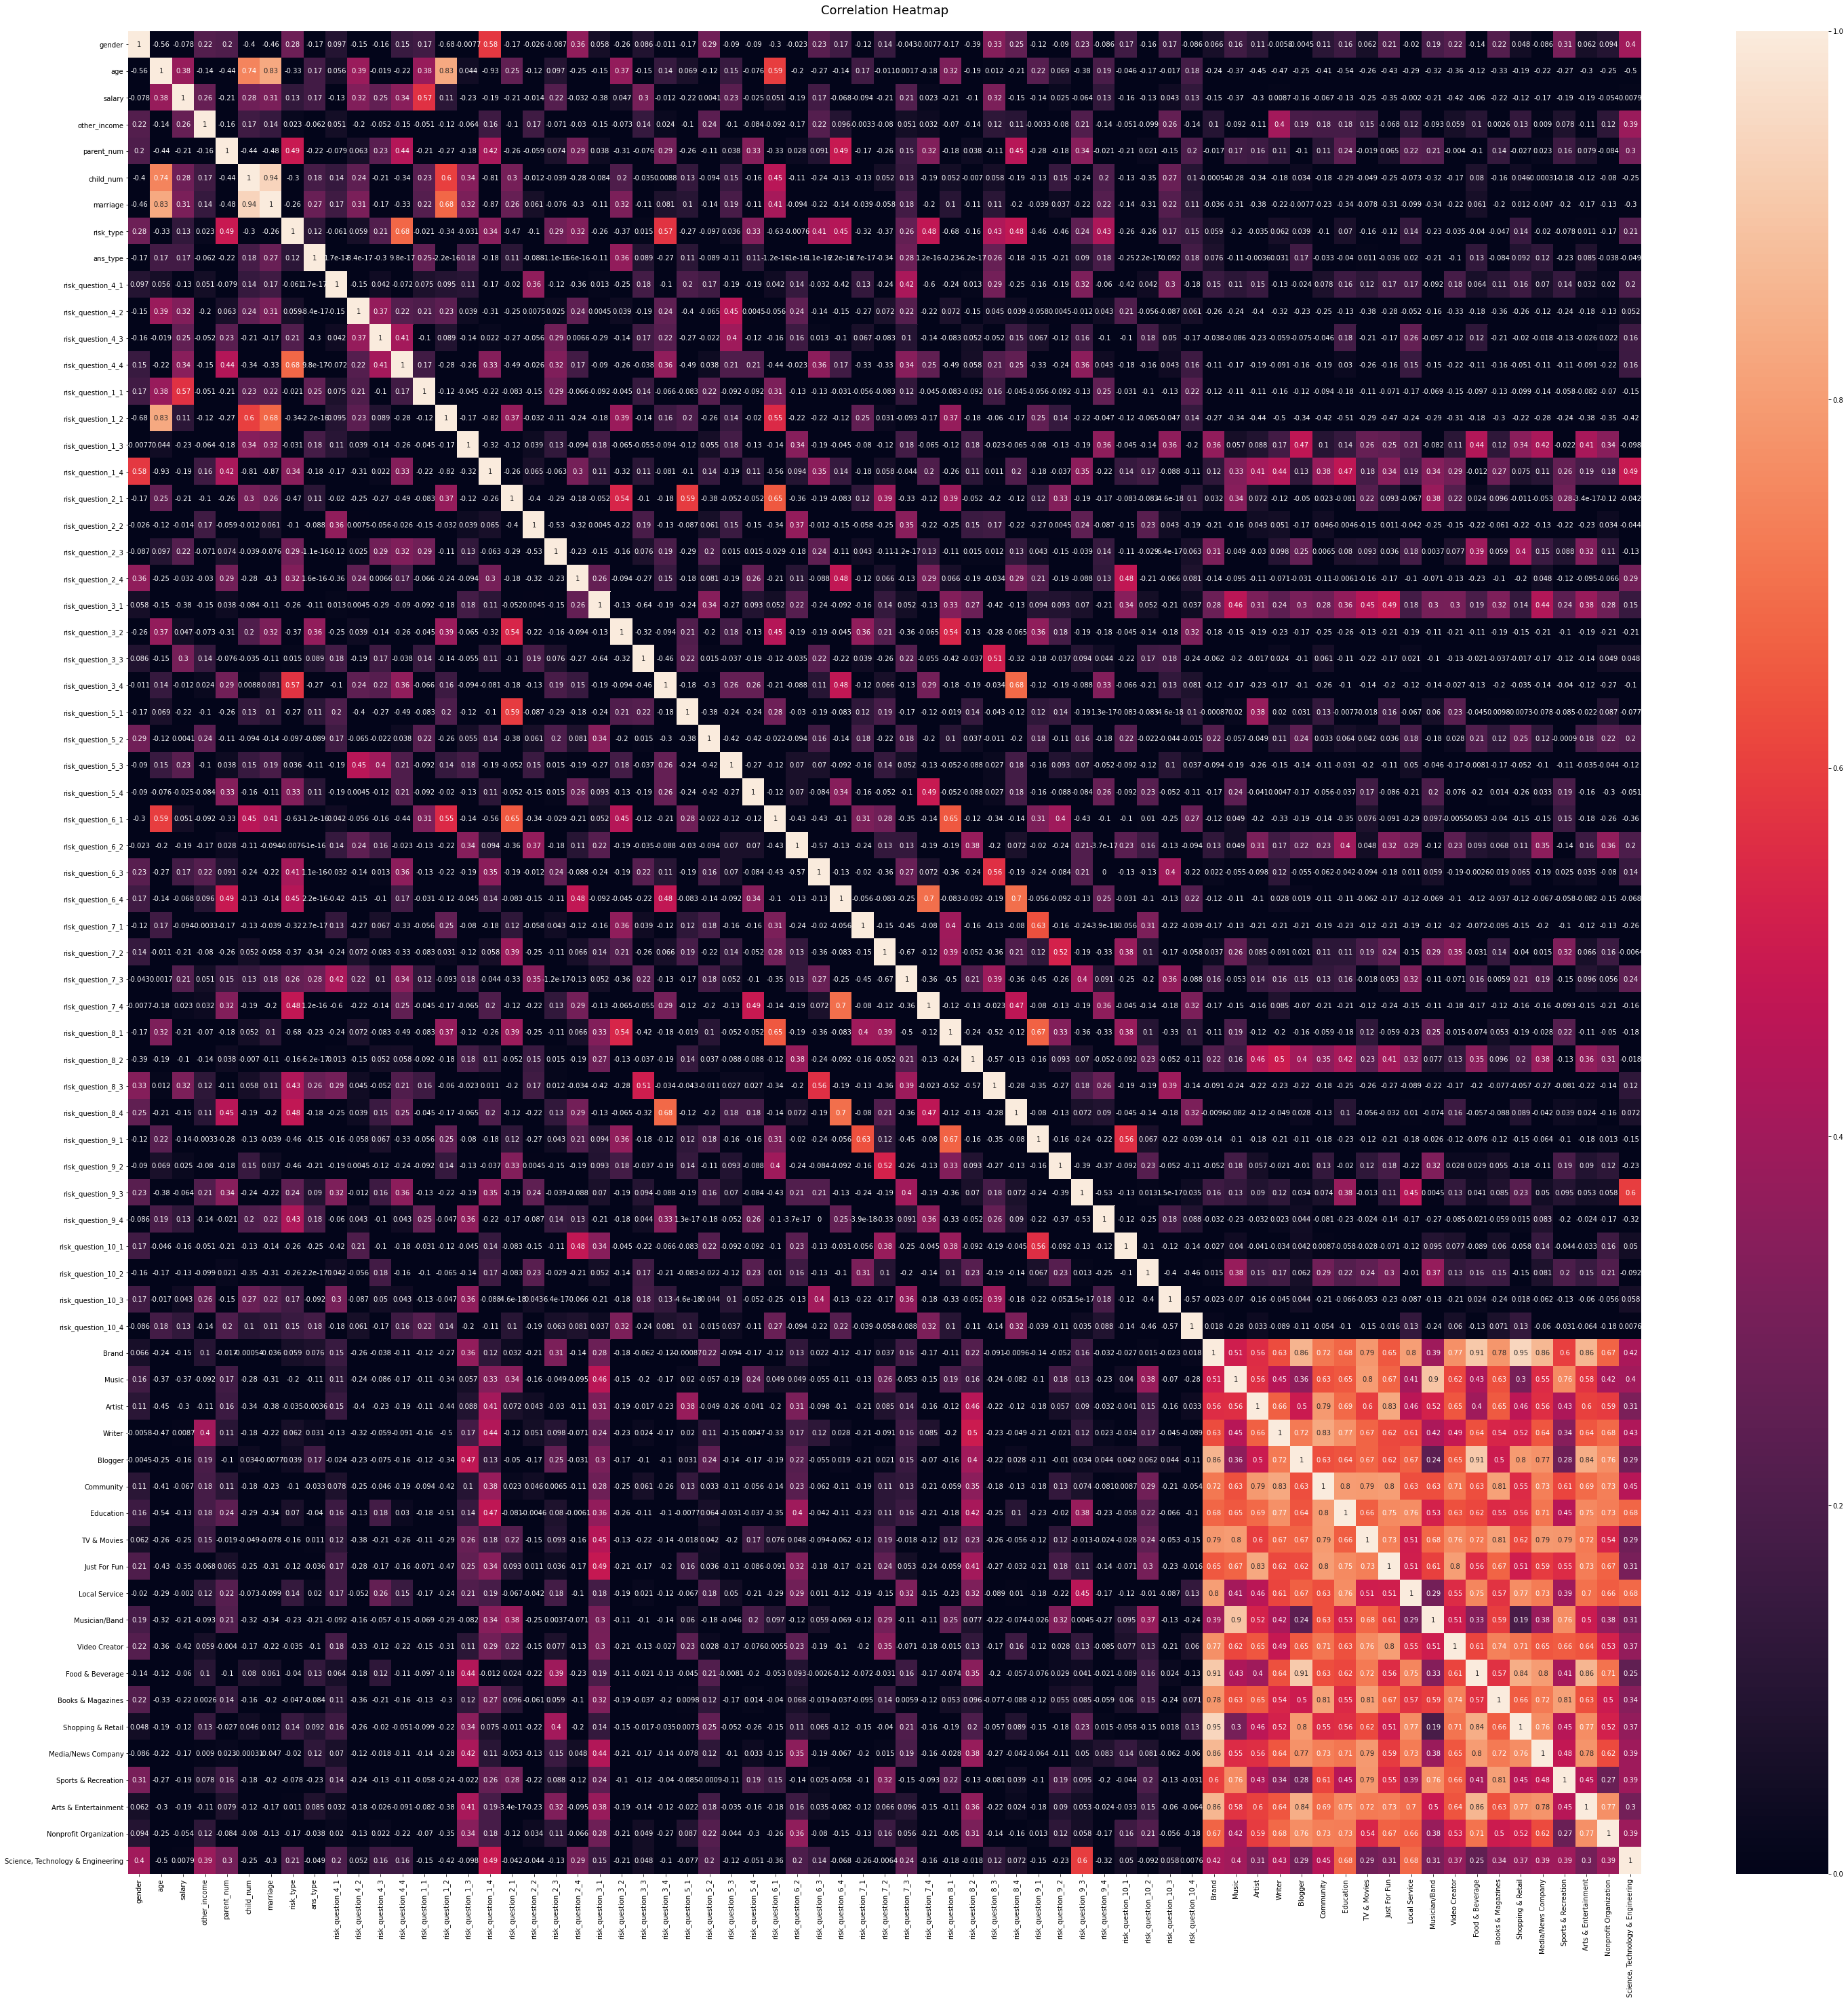

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(50, 50))
heatmap = sns.heatmap(df.corr(), vmin=0, vmax=1, annot=True, xticklabels=True, yticklabels=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=25);

In [47]:
not_normalize_col = [ 'risk_type','categories_version','ans_type']
for i in range(1,11):
    not_normalize_col.append(f'risk_question_{i}')

list_col = []
for col in df.columns:
    if col not in not_normalize_col :
        list_col.append(col)
list_col

['gender',
 'age',
 'salary',
 'other_income',
 'parent_num',
 'child_num',
 'marriage',
 'risk_question_4_1',
 'risk_question_4_2',
 'risk_question_4_3',
 'risk_question_4_4',
 'risk_question_1_1',
 'risk_question_1_2',
 'risk_question_1_3',
 'risk_question_1_4',
 'risk_question_2_1',
 'risk_question_2_2',
 'risk_question_2_3',
 'risk_question_2_4',
 'risk_question_3_1',
 'risk_question_3_2',
 'risk_question_3_3',
 'risk_question_3_4',
 'risk_question_5_1',
 'risk_question_5_2',
 'risk_question_5_3',
 'risk_question_5_4',
 'risk_question_6_1',
 'risk_question_6_2',
 'risk_question_6_3',
 'risk_question_6_4',
 'risk_question_7_1',
 'risk_question_7_2',
 'risk_question_7_3',
 'risk_question_7_4',
 'risk_question_8_1',
 'risk_question_8_2',
 'risk_question_8_3',
 'risk_question_8_4',
 'risk_question_9_1',
 'risk_question_9_2',
 'risk_question_9_3',
 'risk_question_9_4',
 'risk_question_10_1',
 'risk_question_10_2',
 'risk_question_10_3',
 'risk_question_10_4',
 'Brand',
 'Music',
 'Artis

In [48]:
len(list_col)

67

In [49]:
for col in list_col:
    min_value = df[col].min()
    max_value = df[col].max()
    
    df[col] = (df[col] -min_value)/(max_value-min_value)
    
df

,gender,age,salary,other_income,parent_num,child_num,marriage,risk_type,ans_type,risk_question_4_1,...,Musician/Band,Video Creator,Food & Beverage,Books & Magazines,Shopping & Retail,Media/News Company,Sports & Recreation,Arts & Entertainment,Nonprofit Organization,"Science, Technology & Engineering"
0,1.0,0.000000,0.166667,0.0240,0.50,0.000000,0.0,3,2,1.0,...,0.000000,0.115385,0.096154,0.133333,0.151163,0.000000,0.000000,0.058824,0.000000,0.142857
2,0.0,0.000000,0.108333,0.0024,0.50,0.000000,0.0,2,2,1.0,...,0.041096,0.269231,0.307692,0.000000,0.104651,0.261905,0.015873,0.117647,0.333333,0.714286
4,1.0,0.025641,0.208333,0.1440,1.00,0.000000,0.0,4,2,0.0,...,0.013699,0.076923,0.000000,0.133333,0.000000,0.119048,0.015873,0.058824,0.000000,0.142857
6,1.0,0.025641,0.208333,0.0000,0.50,0.000000,0.0,3,3,1.0,...,0.000000,0.076923,0.009615,0.066667,0.034884,0.142857,0.015873,0.235294,0.222222,0.857143
8,1.0,0.000000,0.208333,0.0000,0.50,0.000000,0.0,2,2,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10,1.0,0.025641,0.183333,0.0000,0.25,0.000000,0.0,2,2,1.0,...,0.027397,0.153846,0.048077,0.333333,0.081395,0.095238,0.031746,0.235294,0.111111,0.000000
12,1.0,0.307692,0.083333,0.0120,0.25,0.666667,1.0,2,2,1.0,...,0.000000,0.038462,0.009615,0.133333,0.011628,0.142857,0.031746,0.000000,0.111111,0.071429
14,0.0,0.615385,0.083333,0.0080,0.00,0.666667,1.0,2,3,1.0,...,0.000000,0.923077,0.317308,0.333333,0.476744,0.333333,0.047619,0.117647,0.000000,0.000000
16,1.0,0.000000,0.083333,0.0400,0.50,0.000000,0.0,2,2,1.0,...,0.561644,0.423077,0.125000,0.133333,0.244186,0.142857,0.142857,0.352941,0.444444,0.928571
18,1.0,0.025641,0.583333,0.0000,0.50,0.000000,0.0,3,2,1.0,...,0.000000,0.038462,0.000000,0.000000,0.000000,0.285714,0.000000,0.000000,0.000000,0.714286


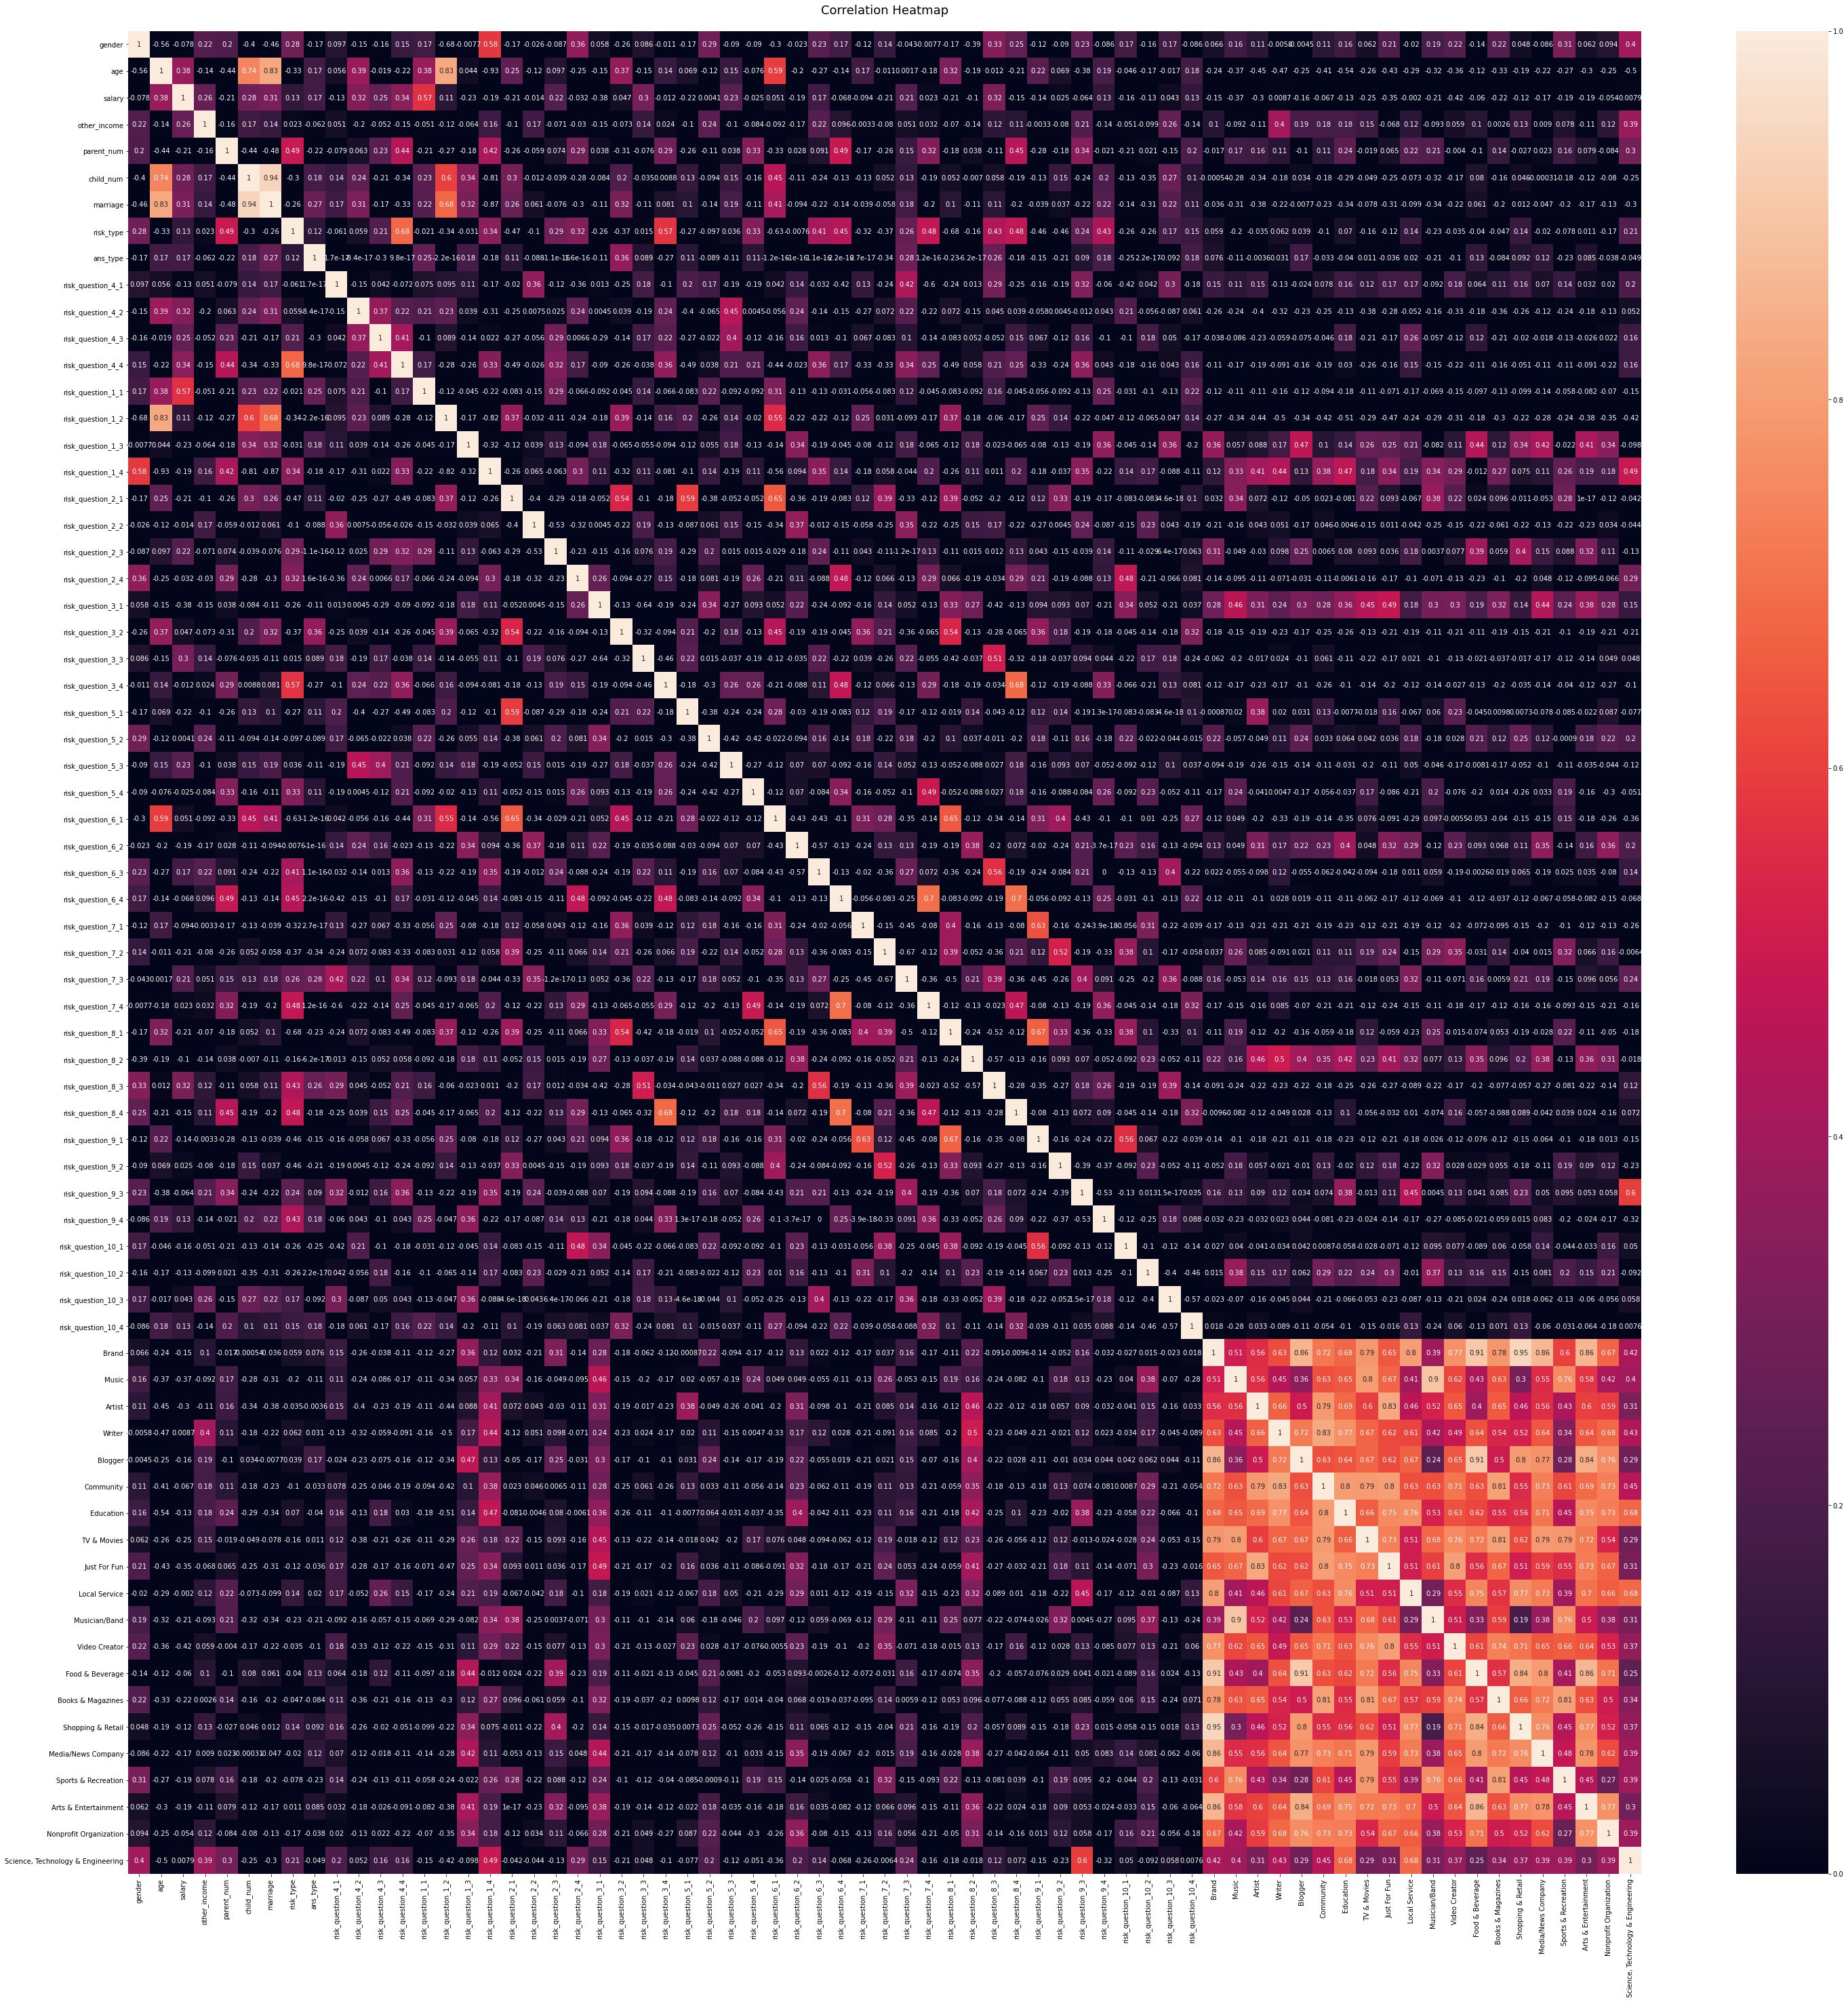

In [50]:
plt.figure(figsize=(50, 50))
heatmap = sns.heatmap(df.corr(), vmin=0, vmax=1, annot=True, xticklabels=True, yticklabels=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=25);


In [51]:
df

,gender,age,salary,other_income,parent_num,child_num,marriage,risk_type,ans_type,risk_question_4_1,...,Musician/Band,Video Creator,Food & Beverage,Books & Magazines,Shopping & Retail,Media/News Company,Sports & Recreation,Arts & Entertainment,Nonprofit Organization,"Science, Technology & Engineering"
0,1.0,0.000000,0.166667,0.0240,0.50,0.000000,0.0,3,2,1.0,...,0.000000,0.115385,0.096154,0.133333,0.151163,0.000000,0.000000,0.058824,0.000000,0.142857
2,0.0,0.000000,0.108333,0.0024,0.50,0.000000,0.0,2,2,1.0,...,0.041096,0.269231,0.307692,0.000000,0.104651,0.261905,0.015873,0.117647,0.333333,0.714286
4,1.0,0.025641,0.208333,0.1440,1.00,0.000000,0.0,4,2,0.0,...,0.013699,0.076923,0.000000,0.133333,0.000000,0.119048,0.015873,0.058824,0.000000,0.142857
6,1.0,0.025641,0.208333,0.0000,0.50,0.000000,0.0,3,3,1.0,...,0.000000,0.076923,0.009615,0.066667,0.034884,0.142857,0.015873,0.235294,0.222222,0.857143
8,1.0,0.000000,0.208333,0.0000,0.50,0.000000,0.0,2,2,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10,1.0,0.025641,0.183333,0.0000,0.25,0.000000,0.0,2,2,1.0,...,0.027397,0.153846,0.048077,0.333333,0.081395,0.095238,0.031746,0.235294,0.111111,0.000000
12,1.0,0.307692,0.083333,0.0120,0.25,0.666667,1.0,2,2,1.0,...,0.000000,0.038462,0.009615,0.133333,0.011628,0.142857,0.031746,0.000000,0.111111,0.071429
14,0.0,0.615385,0.083333,0.0080,0.00,0.666667,1.0,2,3,1.0,...,0.000000,0.923077,0.317308,0.333333,0.476744,0.333333,0.047619,0.117647,0.000000,0.000000
16,1.0,0.000000,0.083333,0.0400,0.50,0.000000,0.0,2,2,1.0,...,0.561644,0.423077,0.125000,0.133333,0.244186,0.142857,0.142857,0.352941,0.444444,0.928571
18,1.0,0.025641,0.583333,0.0000,0.50,0.000000,0.0,3,2,1.0,...,0.000000,0.038462,0.000000,0.000000,0.000000,0.285714,0.000000,0.000000,0.000000,0.714286


In [52]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [53]:
# feature matrix
X = df.drop(['ans_type'], axis=1, inplace=False)

# target vector
y = df['ans_type']

# class labels
labels = []
for i in df.drop(['ans_type'], axis=1, inplace=False).columns:
    labels.append(i)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=28) # 70% training and 30% test


In [54]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=len(X.columns), max_features=len(X.columns), class_weight="balanced", max_leaf_nodes=10, random_state=28)
#DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features=68,max_leaf_nodes=10, random_state=28)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
y_score = clf.score(X,y)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.50      0.33      0.40         3
           2       1.00      0.83      0.91         6
           3       0.33      1.00      0.50         1

    accuracy                           0.70        10
   macro avg       0.61      0.72      0.60        10
weighted avg       0.78      0.70      0.72        10



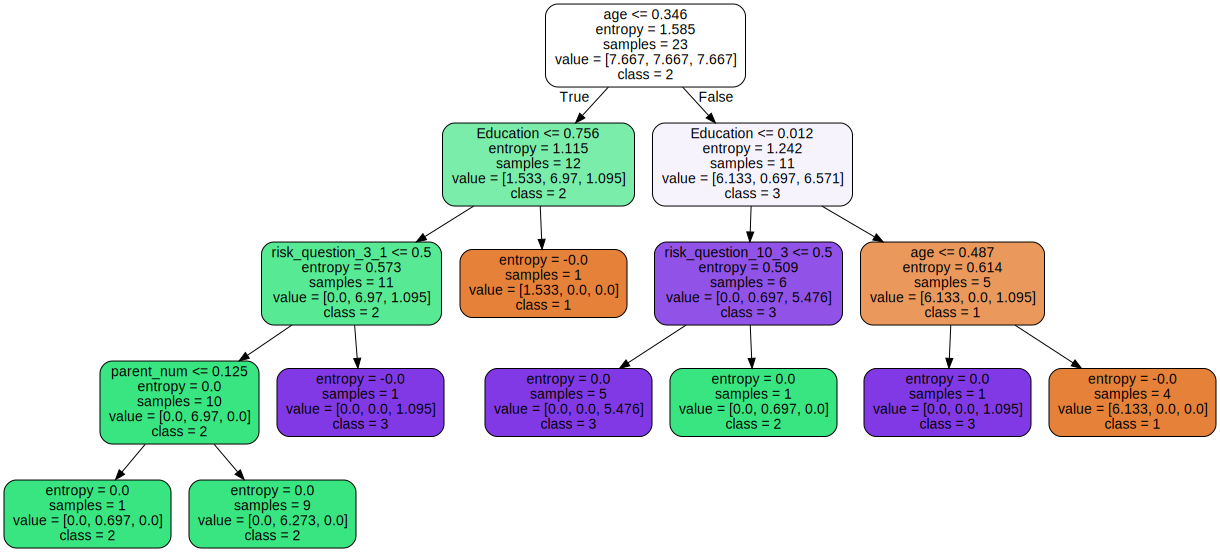

In [55]:
graph = Source(export_graphviz(clf, out_file=None,  
                filled=True, rounded=True,
                special_characters=False,feature_names = labels,class_names=['1','2','3']))

display(SVG(graph.pipe(format='svg')))
